In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML

##Choose appropiate Color palette

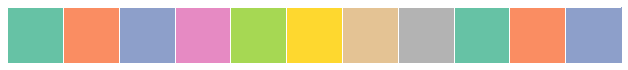

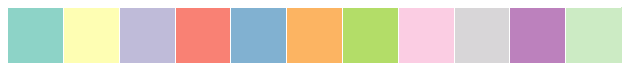

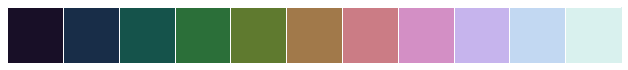

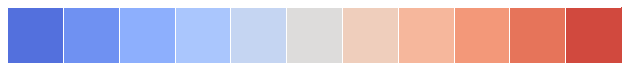

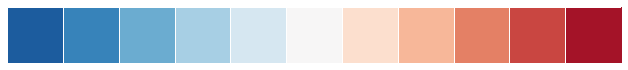

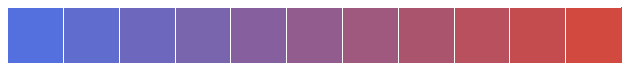

In [85]:
#Test out different color palettes
sns.palplot(sns.color_palette("Set2", 11))
sns.palplot(sns.color_palette("Set3", 11))
sns.palplot(sns.color_palette("cubehelix", 11))
sns.palplot(sns.color_palette("coolwarm", 11))
sns.palplot(sns.color_palette("RdBu_r", 11))
sns.palplot(sns.blend_palette(["#5470de", "#d1493f"], 11))

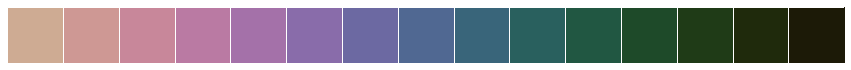

In [3]:
sns.palplot(sns.cubehelix_palette(15, start=1., rot=1.5, dark=0.1, light=.7, reverse=False))

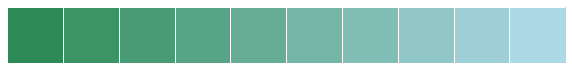

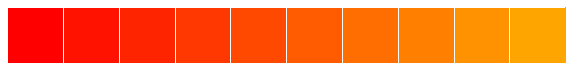

In [90]:
sns.palplot(sns.blend_palette(["seagreen", "lightblue"], 10));
sns.palplot(sns.blend_palette(["red", "orange"], 10));
pal7 = sns.blend_palette(["seagreen", "lightblue"], 11)
pal8 = sns.blend_palette(["red", "orange"], 11)

In [5]:
#save them for use in function
pal1 = sns.color_palette('Set2', 11)
pal2 = sns.cubehelix_palette(11, start=0, rot=3, dark=0.3, light=.7, reverse=True)
pal3 = sns.color_palette("coolwarm", 11)
pal4 = sns.cubehelix_palette(11, start=1., rot=1.5, dark=0.1, light=.7, reverse=False)
pal5 = sns.color_palette("RdBu_r", 11)
pal6 = sns.blend_palette(["#5470de", "#d1493f"], 11)

In [6]:
pal3.as_hex()

[u'#5470de',
 u'#6f92f3',
 u'#8db0fe',
 u'#aac7fd',
 u'#c5d6f2',
 u'#dddcdc',
 u'#efcebd',
 u'#f7b89c',
 u'#f4987a',
 u'#e7745b',
 u'#d1493f']

##Generate the colored parentheses

In [7]:
teststring = "((()(()())(((((((())))))))))"

In [76]:
def parse_paren(some_string, some_palette):
    color_codes = {i:v for i,v in enumerate(some_palette.as_hex())}
    html_parse = '<div style="font-size:18pt; line-height: 24px">'
    depth = 0
    for c in some_string:
        if c == "(" or c == "[":
            #print " "*depth,"("
            html_parse += '<span style="color:{0};">{1}</span>'.format(color_codes[depth], c)
            depth+=1
            
        else:
            depth-=1
            html_parse += '<span style="color:{0};">{1}</span>'.format(color_codes[depth], c)

            #print " "*depth,")"
    html_parse += "</div>"
    return HTML(html_parse)

parse_paren(teststring, pal5)

##Read Language

In [77]:
with open("dyck-0.9-test.txt", "r") as text_file:
    lines = text_file.read()
parse_paren(lines, pal5)

##Generate Sized Parentheses

In [98]:
def parse_paren_size(some_string, some_palette):
    color_codes = {i:v for i,v in enumerate(some_palette.as_hex())}
    html_parse = '<div style="line-height: 30px">'
    depth = 0
    for c in some_string:
        if c == "(" or c == "[":
            html_parse += '<span style="color:{0};font-size:{1}pt">{2}</span>'.format(color_codes[depth], 30-2*depth, c)
            depth+=1
        else:
            depth-=1
            html_parse += '<span style="color:{0};font-size:{1}pt">{2}</span>'.format(color_codes[depth], 30-2*depth, c)

    html_parse += "</div>"
    return HTML(html_parse)

In [99]:
parse_paren_size(teststring, pal2)

##Line Plot for Depth

In [122]:
def parse_paren_depth(some_string):
    depth = 1
    depths = []
    for c in some_string:
        if c == "(" or c == "[":
            depth+=1   
            depths.append(depth)
        else:
            depth-=1    
        
    return depths

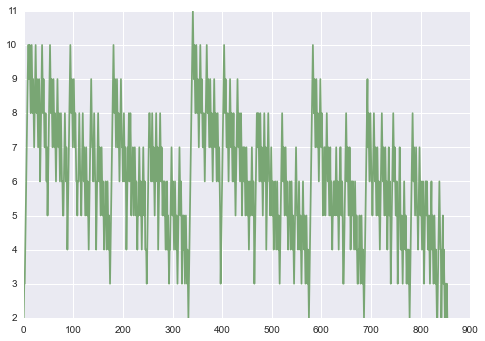

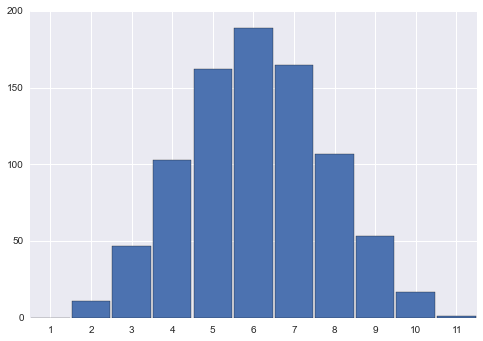

In [123]:
depth_array = parse_paren_depth(lines)
plt.plot(depth_array, color=pal2.as_hex()[6], alpha=.9)
plt.show()
counts = np.bincount(depth_array)
fig, ax = plt.subplots()
ax.bar(range(12), counts, width=.95, align='center')
ax.set(xticks=range(12), xlim=[.5, 11.5])
plt.show()

In [61]:
with open("dyck-0.9.txt", "r") as text_file:
    lines2 = text_file.read()
def parse_depency_range(some_string):
    depth = 0
    ranges_count = {l+1:[] for l in xrange(11)}
    ranges = []
    depths = []  
    opposites = {"(":")", "[":"]", "{":"}"}
    for c in some_string:
        if c == "(" or c == "[":
            depth+=1   
            depths.append(c)
            ranges.append(0)
            ranges = [x+1 for x in ranges]
        elif c == opposites[depths[-1]]:
            depths.pop()
            curr_range = ranges.pop()
            ranges_count[len(depths)+1].append(curr_range)
            ranges = [x+1 for x in ranges]

            depth-=1    
    for i, v in ranges_count.iteritems():
        print "For Depth {0}, average dependency length is {1:.4g} with std {2:.4g} in {3} occurrences".format(i, np.mean(v), np.std(v), len(v))
    
    return ranges_count
dep_lengths = parse_depency_range(lines2)

For Depth 1, average dependency length is 234.7 with std 328.5 in 41073 occurences
For Depth 2, average dependency length is 57.4 with std 110.1 in 164384 occurences
For Depth 3, average dependency length is 20.17 with std 41.88 in 438019 occurences
For Depth 4, average dependency length is 9.283 with std 18.28 in 816439 occurences
For Depth 5, average dependency length is 5.21 with std 9.019 in 1089027 occurences
For Depth 6, average dependency length is 3.353 with std 4.897 in 1053299 occurences
For Depth 7, average dependency length is 2.375 with std 2.848 in 734320 occurences
For Depth 8, average dependency length is 1.798 with std 1.723 in 360768 occurences
For Depth 9, average dependency length is 1.43 with std 1.042 in 118515 occurences
For Depth 10, average dependency length is 1.179 with std 0.5715 in 23399 occurences
For Depth 11, average dependency length is 1 with std 0 in 2099 occurences


##Visualize Dyck2

In [70]:
with open("dyck2-0.9-test.txt", "r") as text_file:
    lines3 = text_file.read()

In [78]:
parse_paren(lines3, pal5)

In [91]:
def parse_two_paren(some_string, some_palette, second_palette):
    color_codes = {i:v for i,v in enumerate(some_palette.as_hex())}
    color_codes2 = {i:v for i,v in enumerate(second_palette.as_hex())}
    html_parse = '<div style="font-size:18pt; line-height: 24px">'
    depth = 0
    for c in some_string:
        if c == "(" or c == "[":
            #print " "*depth,"("
            curr_col = color_codes[depth]
            if c == "[":
                curr_col = color_codes2[depth]
            html_parse += '<span style="color:{0};">{1}</span>'.format(curr_col, c)
            depth+=1
            
        else:
            depth-=1
            curr_col = color_codes[depth]
            if c == "]":
                curr_col = color_codes2[depth]
            html_parse += '<span style="color:{0};">{1}</span>'.format(curr_col, c)

            #print " "*depth,")"
    html_parse += "</div>"
    return HTML(html_parse)

In [105]:
parse_two_paren(lines3, pal7, pal8)

In [ ]:
#offset language height parameter